In [30]:
import plotly
import pyecharts
import matplotlib

import pandas as pd
import seaborn as sns

from pyecharts import Bar
from pyecharts import Line
from wordcloud import WordCloud

from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('results.csv',encoding = 'gbk')

In [32]:
df

,排名,电视剧名称,年份,评分,评价人数,导演,编剧,主演,类型,集数,单集片长,豆瓣网址
0,1,父母爱情,2014,9.3,37181,孔笙,刘静,郭涛 / 梅婷 / 王菁华 / 郭广平 / 张延,爱情 / 家庭,44,45,https://movie.douban.com/subject/19965220/
1,2,毛骗 第二季,2011,9.3,14595,李洪绸 / 邢冬冬,李洪绸,杨羽 / 安宁 / 邢冬冬 / 黎伟 / 邵庄,悬疑 / 犯罪,14,72,https://movie.douban.com/subject/6894818/
2,3,战长沙,2014,9.2,89214,孔笙 / 张开宙,吴桐 / 曾璐,霍建华 / 杨紫 / 左小青 / 任程伟 / 牛骏峰,剧情 / 历史,32,45,https://movie.douban.com/subject/20258941/
3,4,琅琊榜,2015,9.2,255060,孔笙 / 李雪,海宴,胡歌 / 刘涛 / 王凯 / 陈龙 / 黄维德,剧情 / 古装,54,45,https://movie.douban.com/subject/25754848/
4,5,红色,2014,9.2,62941,杨磊,徐兵,陶虹 / 张鲁一 / 周一围 / 李天柱 / 谢园,剧情 / 战争,48,40,https://movie.douban.com/subject/25966028/
5,6,黎明之前,2010,9.2,30226,刘江,黄珂,吴秀波 / 林永健 / 陆剑民 / 田小洁 / 张_临,剧情 / 悬疑 / 历史,30,45,https://movie.douban.com/subject/4894070/
6,7,茶馆,2010,9.2,7647,何群,叶广芩 / 杨国强,陈宝国 / 梁天 / 谢钢 / 周里京 / 石小满,剧情,39,42,https://movie.douban.com/subject/3271273/
7,8,禽兽超人,2015,9.2,463,於水,於水,於水 / 耿琪,剧情,12,3,https://movie.douban.com/subject/26807624/
8,9,小戏骨：红楼梦之刘姥姥进大观园,2017,9.1,26264,潘礼平 / 刘玉洁,刘玉洁 / 罗妤佳,释小松 / 周漾_ / 钟熠_ / 郭飞歌 / 杨纳娜,剧情 / 儿童 / 古装,9,25,https://movie.douban.com/subject/26951951/
9,10,我们的法兰西岁月,2012,9.1,2939,康洪雷,李克威,朱亚文 / 钟秋 / 李艺科 / 马晓灿 / 缪俊杰,剧情 / 历史,31,40,https://movie.douban.com/subject/6018955/


# How many people comment each year?
***
> **With the increase of Internet users and the promotion of douban, the number of comments should show a growing trend.**
***

In [33]:
df['年份'] = df['年份'].apply(int)
year2010 = df[(df['年份'] < 2011)]
year2011 = df[(df['年份'] > 2010) & (df['年份'] < 2012)]
year2012 = df[(df['年份'] > 2011) & (df['年份'] < 2013)]
year2013 = df[(df['年份'] > 2012) & (df['年份'] < 2014)]
year2014 = df[(df['年份'] > 2013) & (df['年份'] < 2015)]
year2015 = df[(df['年份'] > 2014) & (df['年份'] < 2016)]
year2016 = df[(df['年份'] > 2015) & (df['年份'] < 2017)]
year2017 = df[(df['年份'] > 2016) & (df['年份'] < 2018)]
year2018 = df[(df['年份'] > 2017)]

In [34]:
df_year = pd.DataFrame({'年份': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
                        '评价总人数':[year2010['评价人数'].sum(),
                                 year2011['评价人数'].sum(),
                                 year2012['评价人数'].sum(),
                                 year2013['评价人数'].sum(),
                                 year2014['评价人数'].sum(),
                                 year2015['评价人数'].sum(),
                                 year2016['评价人数'].sum(),
                                 year2017['评价人数'].sum(),
                                 year2018['评价人数'].sum()]})

In [35]:
df_year

,年份,评价总人数
0,2010,484597
1,2011,819643
2,2012,482647
3,2013,627823
4,2014,950080
5,2015,1207408
6,2016,1408464
7,2017,3052331
8,2018,2214675


In [36]:
attr = df_year.年份
v1 = df_year.评价总人数
bar = Bar("2010年代各年评价总人数")
bar.add("评价总人数", attr, v1, mark_line = ["average"], label_color = ['#FFDAB9'])

bar

***
> **The results are generally in line with the growth trend, but 11 and 17 years are more prominent, so we took out 17 years and tried to analyze the reasons for this phenomenon.**
***

In [37]:
top10 = year2017.sort_values(by = '评价人数', ascending = False).head(10)

In [38]:
top10

,排名,电视剧名称,年份,评分,评价人数,导演,编剧,主演,类型,集数,单集片长,豆瓣网址
10,11,白夜追凶,2017,9.0,244112,王伟,指纹 / 顾小白,潘粤明 / 王泷正 / 梁缘 / 吕晓霖 / 尹姝贻,剧情 / 悬疑 / 犯罪,32,45,https://movie.douban.com/subject/26883064/
66,67,人民的名义,2017,8.3,206583,李路,周梅森,陆毅 / 柯蓝 / 张丰毅 / 吴刚 / 许亚军,剧情 / 悬疑 / 犯罪,52,55,https://movie.douban.com/subject/26727273/
830,851,三生三世十里桃花,2017,6.4,123056,林玉芬 / 余翠华,弘伙 / 唐七,杨幂 / 赵又廷 / 张智尧 / 迪丽热巴 / 高伟光,剧情 / 爱情,58,45,https://movie.douban.com/subject/25975243/
2076,2108,漂亮的李慧珍,2017,3.1,108560,赵晨阳,卢至柔 / 杨青,迪丽热巴 / 盛一伦 / 李溪芮 / 张彬彬 / 王骁,喜剧 / 爱情,40,43,https://movie.douban.com/subject/26752700/
2103,2135,深夜食堂,2017,2.8,104170,蔡岳勋 / 胡涵清,陈怡方,黄磊 / 赵又廷 / 张钧甯 / 海清 / 何炅,剧情,36,45,https://movie.douban.com/subject/26411410/
954,978,我的前半生,2017,6.2,101779,沈严,秦雯 / 亦舒,靳东 / 马伊_ / 袁泉 / 雷佳音 / 吴越,剧情 / 家庭,42,45,https://movie.douban.com/subject/26358696/
1324,1355,猎场,2017,5.5,88272,姜伟,姜伟,胡歌 / 菅纫姿 / 陈龙 / 孙红雷 / 张嘉译,剧情,52,45,https://movie.douban.com/subject/26322642/
39,40,琅琊榜之风起长林,2017,8.5,87108,孔笙 / 李雪,海宴,黄晓明 / 刘昊然 / 佟丽娅 / 张慧雯 / 梅婷,剧情 / 古装,50,45,https://movie.douban.com/subject/26665065/
113,114,大军师司马懿之军师联盟,2017,8.1,80227,张永新,常江,吴秀波 / 刘涛 / 李晨 / 于和伟 / 张钧甯,剧情 / 爱情 / 战争 / 古装,42,45,https://movie.douban.com/subject/26605881/
25,26,你好，旧时光,2017,8.7,80043,沙漠,八月长安 / 卓越泡沫 / 赵_ / 陈潇骁 / 陆洋 / 邓珂 / 潘可唯 / 张紫微 ...,李兰迪 / 张新成 / 周澄奥 / 李牵 / 许梦圆,剧情 / 爱情,30,45,https://movie.douban.com/subject/26581830/


# What are the top 10 hottest TV shows of 2017？
***
> **The number of evaluators can reflect the heat, and the score can reflect the reputation. We use these two parameters to form the scatter diagram.**
***

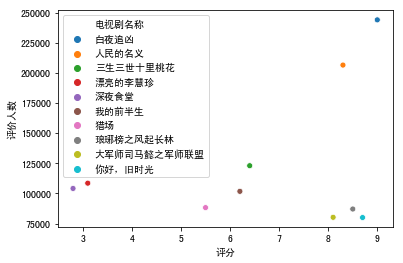

In [39]:
axes = sns.scatterplot(x = '评分', y = '评价人数', hue = '电视剧名称', data = top10)

***
> **We found that the prominence of 2017 is due to the emergence of several TV series that have caused heated discussions, but these TV series are also divided into good and bad.**
>> **'深夜食堂' and '漂亮的李慧珍' have attracted extensive comments from netizens, but their scores are very low. Obviously, it's not uncommon for embarrassing, bad shows to get good ratings these days.**
***
>> **But there are also some good TV series with high popularity and high reputation like '白夜追凶' and '人民的名义'. At the same time, the most popular TV series '白夜追凶' in 2017 is an online drama. It can be seen that people are gradually turning to the Internet in the way of watching TV series.**
***

In [40]:
styles = []
for i in df['类型'].fillna(''):
    style = i.strip().split(' / ')
    for j in style:
        styles.append(j)
tmp = pd.DataFrame({'styles': styles})
tmp = tmp[tmp['styles'] != '']

In [41]:
tmp

,styles
0,爱情
1,家庭
2,悬疑
3,犯罪
4,剧情
5,历史
6,剧情
7,古装
8,剧情
9,战争


# What kind of TV series were most popular in the 10's？
***
> **From the types of TV series played, we can roughly see what kind of TV series are popular with the public.**
***

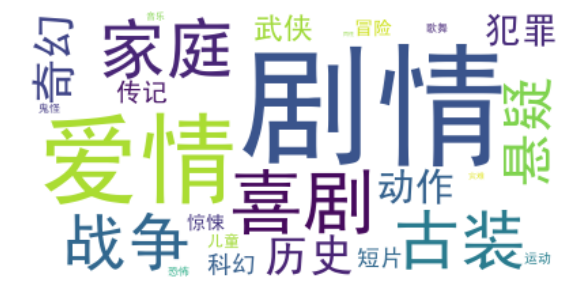

In [42]:
x = tmp['styles'].value_counts()
wc = WordCloud(background_color = 'white', font_path = 'SimHei.ttf', max_words = 1000, max_font_size = 100, random_state = 20)
wc.generate_from_frequencies(x)
plt.figure(figsize=(15, 5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

***
> **As a result, drama, romance and comedy still dominate TV series**
***